In [19]:
from sklearn.datasets import load_boston
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from matplotlib import pyplot as plt

boston_data=load_boston()
x_data = boston_data.data
y_data = boston_data.target

names=boston_data.feature_names
FeaturesNums = 13
DataNums = len(x_data)
print (boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
# 预处理
from sklearn import preprocessing

# 清除异常值
DelList0=[]
for i in range(DataNums):
    if (y_data[i] >= 49 or y_data[i] <= 1):
        DelList0.append(i)
DataNums -= len(DelList0)
x_data = np.delete(x_data,DelList0,axis=0)
y_data = np.delete(y_data,DelList0,axis=0)

# 去除无用feature
DelList1=[]
for i in range(FeaturesNums):
    if (names[i] == 'ZN' or
        names[i] == 'INDUS' or
        names[i] == 'RAD' or
        names[i] == 'TAX' or
        names[i] == 'CHAS' or
        names[i] == 'NOX' or
        names[i] == 'B' or
        names[i] == 'PTRATIO'):
      DelList1.append(i)
x_data = np.delete(x_data, DelList1, axis=1)
names = np.delete(names, DelList1)
FeaturesNums -= len(DelList1)

# 数据分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# 归一化
from sklearn.preprocessing import MinMaxScaler, scale
nms = MinMaxScaler()
x_train = nms.fit_transform(x_train)
x_test  = nms.fit_transform(x_test)
y_train = nms.fit_transform(y_train.reshape(-1,1))
y_test  = nms.fit_transform(y_test.reshape(-1,1))

array([[1.05346714e-01, 5.25004790e-01, 8.32131823e-01, 1.71946978e-01,
        3.95943318e-01],
       [1.94856692e-01, 2.52730408e-01, 1.00000000e+00, 4.72668777e-02,
        7.95776605e-01],
       [3.42455600e-04, 6.54148304e-01, 1.27703399e-01, 6.80684821e-01,
        7.16865796e-02],
       ...,
       [1.23925950e-03, 4.36865300e-01, 6.02471679e-01, 2.34078113e-01,
        2.62017227e-01],
       [2.99815662e-01, 4.32458325e-01, 9.21730175e-01, 7.61701817e-02,
        5.59322034e-01],
       [1.34895002e-01, 5.15424411e-01, 9.64984552e-01, 1.10829077e-01,
        4.01778272e-01]])

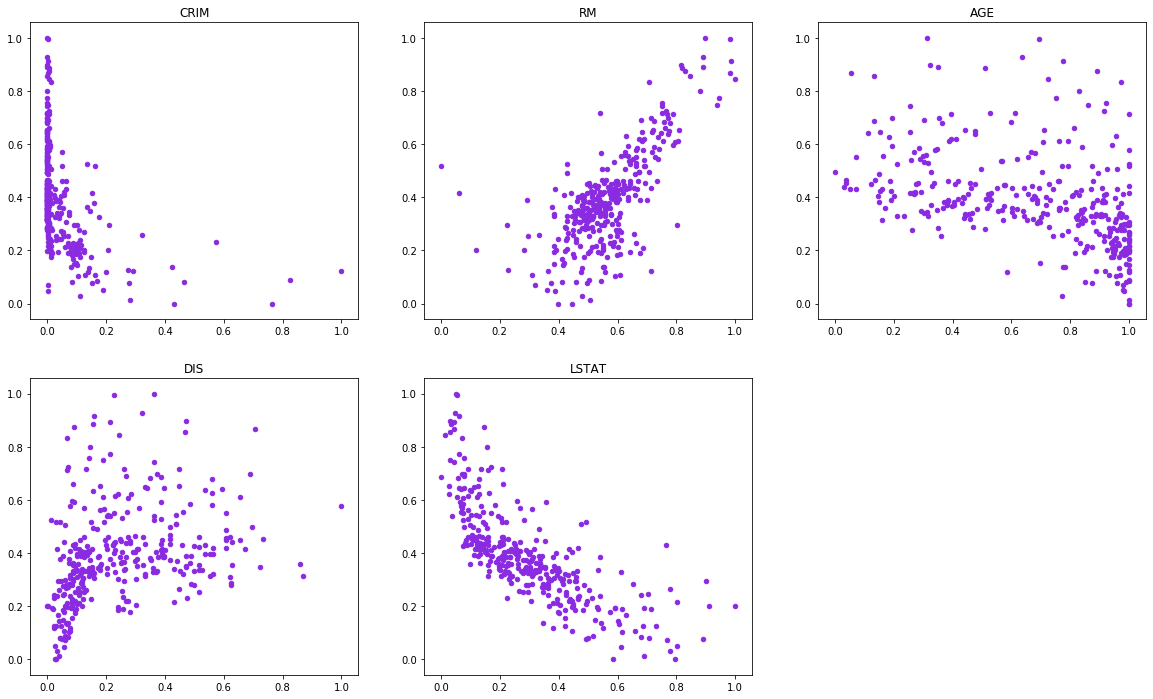

In [16]:
# 每个Feature和target二维关系图
plt.subplots(figsize=(20,12))
for i in range(FeaturesNums):
    plt.subplot(231+i)
    plt.scatter(x_train[:,i],y_train,s=20,color='blueviolet')
    plt.title(names[i])
plt.show()

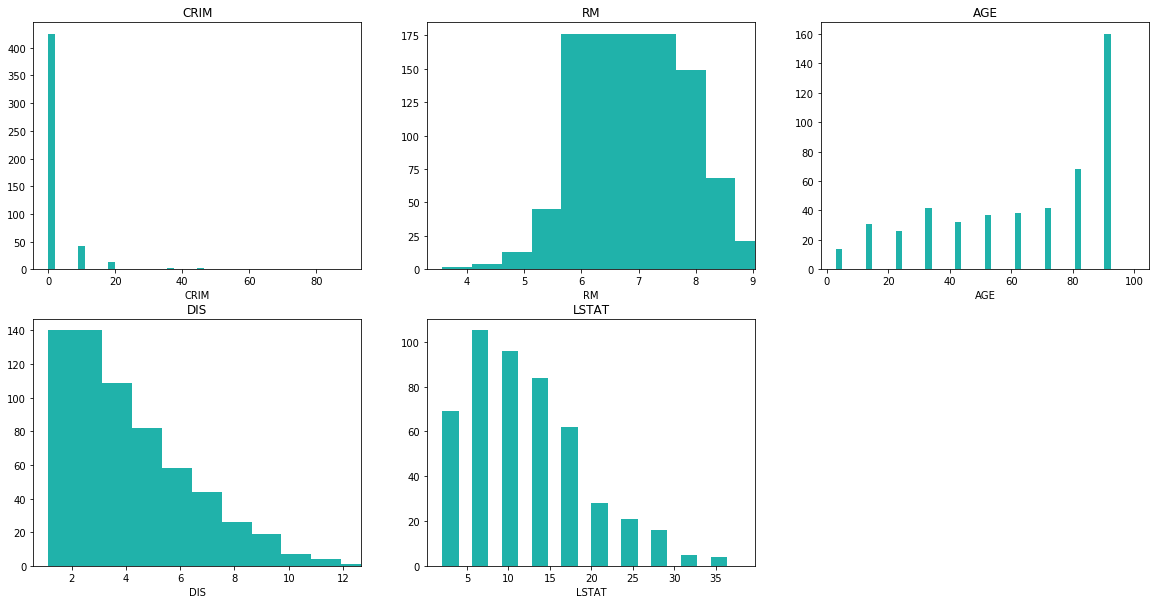

In [17]:
plt.subplots(figsize=(20,10))
for i in range(FeaturesNums):
    plt.subplot(231+i)
    plt.hist(x_data[:,i],color='lightseagreen',width=2)
    plt.xlabel(names[i])
    plt.title(names[i])
plt.show()

MSE = 0.013304697805737791

R2  = 0.44625845284900767



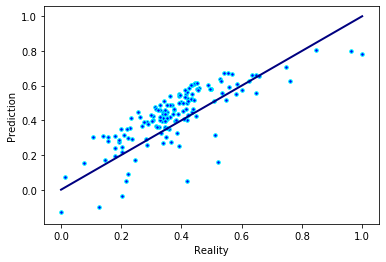

In [13]:
# 线性回归LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("MSE =", mean_squared_error(y_test, y_pred),end='\n\n')
print ("R2  =", r2_score(y_test, y_pred),end='\n\n')

# 画图
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c="blue", edgecolors="aqua",s=13)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
ax.set_xlabel('Reality')
ax.set_ylabel('Prediction')
plt.show()

In [14]:
# SVR模型linear核
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, cross_val_score
linear_svr = SVR(kernel='linear')
# linear_svr.fit(x_train, y_train)
# linear_pred = linear_svr.predict(x_test)
linear_svr_pred = cross_val_predict(linear_svr, x_train, y_train, cv=5)
linear_svr_score = cross_val_score(linear_svr, x_train, y_train, cv=5)
linear_svr_meanscore = linear_svr_score.mean()
print ("Linear_SVR_Score =",linear_svr_meanscore,end='\n')
'''
fig, ax = plt.subplots()
ax.scatter(y_test, linear_pred, c="blue", edgecolors="aqua",s=13)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
ax.set_xlabel('Reality')
ax.set_ylabel('Prediction')
plt.show()
'''

Linear_SVR_Score = 0.6497361775614359
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

'\nfig, ax = plt.subplots()\nax.scatter(y_test, linear_pred, c="blue", edgecolors="aqua",s=13)\nax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], \'k\', lw=2, color=\'navy\')\nax.set_xlabel(\'Reality\')\nax.set_ylabel(\'Prediction\')\nplt.show()\n'

D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

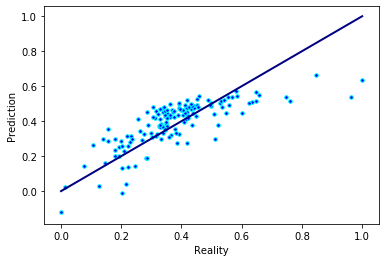

In [15]:
# SVR模型poly核
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, cross_val_score
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train, y_train)
poly_pred = poly_svr.predict(x_test)
poly_svr_pred = cross_val_predict(poly_svr, x_train, y_train, cv=5)
poly_svr_score = cross_val_score(poly_svr, x_train, y_train, cv=5)
poly_svr_meanscore = poly_svr_score.mean()
print ('\n',"Poly_SVR_Score =",poly_svr_meanscore,end='\n')

fig, ax = plt.subplots()
ax.scatter(y_test, poly_pred, c="blue", edgecolors="aqua",s=13)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
ax.set_xlabel('Reality')
ax.set_ylabel('Prediction')
plt.show()